# References

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Regularisation

[Andrew Ng, Regularization (C2W1L04)](https://www.youtube.com/watch?v=6g0t3Phly2M)  
[Andrew Ng, Why Regularization Reduces Overfitting (C2W1L05)](https://www.youtube.com/watch?v=NyG-7nRpsW8)

For those who are interested, a more in-depth & mathematical discussion of regularisation.

[Sergey Levine, UC Berkeley, CS 182 Lecture 3 Part 2: Error Analysis](https://www.youtube.com/watch?v=U_cpdaJ-adk)

## Dropout

[Andrew Ng, Dropout Regularization (C2W1L06)](https://www.youtube.com/watch?v=D8PJAL-MZv8)  
[Andrew Ng, Understanding Dropout (C2W1L07)](https://www.youtube.com/watch?v=ARq74QuavAo)

### An anecdote on Dropout

Dropout was (re-)discovered by Geoffrey Hinton...

Hinton says: "I went to the bank. The tellers kept changing and I asked one of them why. He said he didn't know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud a bank. This made me realise that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting." (DLWP, 150-1)

<!-- ![Hinton Dropout, Reddit](images/hinton.dropout-reddit.png) -->
![Hinton Dropout, Reddit](https://github.com/jchwenger/AI/blob/main/lectures/04/images/hinton.dropout-reddit.png?raw=true)

<small>[Hinton on Dropout, Reddit](https://www.reddit.com/r/MachineLearning/comments/4w6tsv/ama_we_are_the_google_brain_team_wed_love_to/)</small>

[Geoffrey Hinton Does the brain do backpropagation? until 1h17'30''](https://www.youtube.com/watch?v=qIEfJ6OBGj8?start=4408)

## TensorBoard

[Google Research, Yufeng Guo, Visualizing Your Model Using TensorBoard](https://www.youtube.com/watch?v=qEQ-_EId-D0)

## Chollet, "On the Measure of Intelligence"

[arXiv paper](https://arxiv.org/abs/1911.01547)  
[Yannic Kilcher, On The Measure Of Intelligence by F. Chollet](https://www.youtube.com/playlist?list=PL1v8zpldgH3oKkBnyGxdhDI0kphmy2Fun)

## Kevin Murphy, Cow vs Camel Overfitting example

[Kevin Murphy, The Four Pillars of Machine Learning, until 15'10](https://youtu.be/uhcdw5rvqqE?si=_tdXn3Uo_O8F4OgG&t=779)

## *Seeing* Overfitting

A few graphs using `matplotlib` that show overfitting in action.

In [2]:
num_points = 11
degree = 10
x = np.linspace(0, 10, num_points)
y = x + np.random.random(size=11) - 0.5

p = np.polyfit(x, y, degree)

xx = np.linspace(0, 10, 101)
def fit(xx, degree):
    yy = np.zeros(len(xx))
    for i in range(len(p)):
        yy += xx ** (degree - i) * p[i]
    return yy
yy = fit(xx, degree)

poly_str = ''
for i in range(degree):
    poly_str += str(p[i]) + 'x^' + str(degree - i) + ' + '
poly_str += str(p[degree])

In [3]:
num_points = 11
degree = 10
x = np.linspace(0, 10, num_points)
y = x + np.random.random(size=11) - 0.5

# https://numpy.org/doc/stable/reference/routines.polynomials.html
p = np.polynomial.Polynomial.fit(x, y, degree)

xx, yy = p.linspace(n=100, domain=[0,10])

Consider the following dataset.

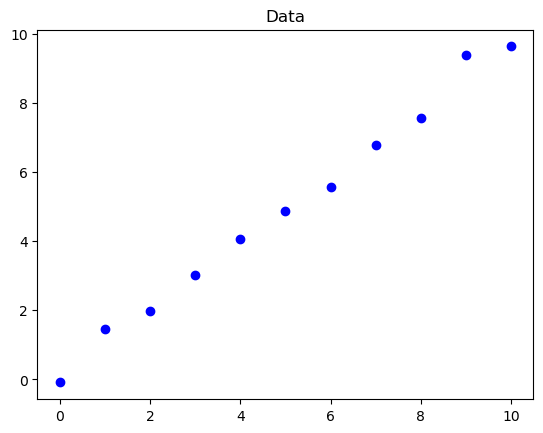

In [4]:
plt.plot(x, y, 'bo')
plt.title('Data')
plt.show()

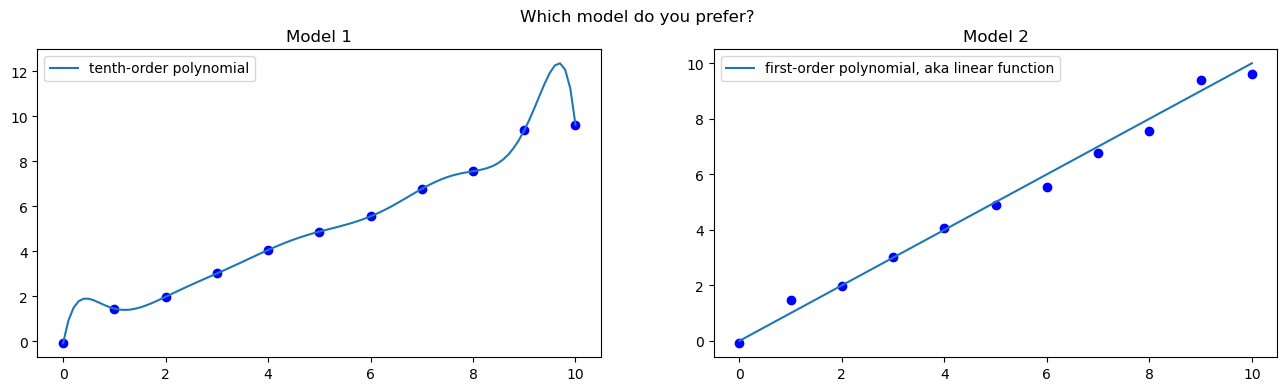

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

fig.suptitle("Which model do you prefer?")
ax1.plot(x, y, 'bo')
ax1.plot(xx, yy, label="tenth-order polynomial")
ax1.set_title('Model 1')
ax1.legend()

ax2.plot(x, y, 'bo')
ax2.plot(x, x, label="first-order polynomial, aka linear function")
ax2.set_title('Model 2')
ax2.legend()
plt.show()

In [6]:
print("Data: y = x + u, u ~ U(-0.5, 0.5)")
print("Model 1:")
print("y = x")
print()
print("Model 2:")
print(f"y =", p)

Data: y = x + u, u ~ U(-0.5, 0.5)
Model 1:
y = x

Model 2:
y = 4.876383987739791 + 3.0627648096590487·x¹ - 3.15656972957911·x² +
19.811196007507203·x³ + 42.78665056595714·x⁴ - 76.63442109648864·x⁵ -
181.48885850611538·x⁶ + 114.0915013058605·x⁷ + 287.9402582671659·x⁸ -
55.47261136910865·x⁹ - 146.18752333191472·x¹⁰


I expect you prefer Model 2. We prefer simpler models – a principle called **Occam's razor**.

The tenth order polynomial (Model 1) fits our data perfectly, but the fit is too good ("overkill").

Model 1 won't generalise well to new data!

### Occam's razor

"Novacula Occami", aka "lex parsimoniae", the **law of parsimony**.

*Entities are not to be multiplied beyond necessity.*

("Non sunt multiplicanda entia sine necessitate.")([Wikipedia](https://en.wikipedia.org/wiki/Occam%27s_razor))

<!-- <img style="float:right;height:400px" src="images/ockham.jpg"> -->
<img style="float:right;height:400px" src="https://github.com/jchwenger/AI/blob/main/lectures/04/images/ockham.jpg?raw=true
">

<small style="position:absolute;bottom:0;right:0">[William of Ockham (c.  1287–1347), Wikipedia](https://en.wikipedia.org/wiki/William_of_Ockham) (♡μ_μ)</small>

In other words:

When two explanations for a phenomenon are equal in other respects, **prefer the simpler one**.

In our case: **prefer simpler models**.  
(Models with as little capacity as possible without losing in performance, capacity being the total number of parameters.)

#### Note

The race to build bigger models does not contradict this.

It's happening because an increase in size, so far, it has only improved performance and generalisation! The 'two explanations' (smaller vs bigger models) are not equal.

In [7]:
def distance(x, y, x0, y0):
    """
    Return distance between point
    P[x0,y0] and a curve (x,y)
    """
    d_x = x - x0
    d_y = y - y0
    dis = np.sqrt(d_x**2 + d_y**2)
    return dis

def min_distance(x, y, P, precision=5):
    """
    Compute minimum/a distance/s between
    a point P[x0,y0] and a curve (x,y)
    rounded at `precision`.

    ARGS:
        x, y      (array)
        P         (tuple)
        precision (int)

    Returns min indexes and distances array.
    """
    # compute distance
    d = distance(x, y, P[0], P[1])
    d = np.round(d, precision)
    # find the minima
    glob_min_idxs = np.argwhere(d==np.min(d)).ravel()
    return glob_min_idxs, d

In [8]:
def noisy_line(x, r=3):
    return x + np.random.random(size=x.shape) * r - r/2 # and adding some noise: y = x + u | u ~ U(-r/2, r/2)

In [9]:
def plot_polynomial(degree, train_x, train_y, test_x, test_y, fn, domain, xlim,ylim):

    p = np.polynomial.Polynomial.fit(train_x,train_y, deg=degree)

    xx, yy = p.linspace(n=10000, domain=domain)

    fig, ax = plt.subplots(figsize=(7, 7))

    ax.scatter(train_x, train_y, label="train data")
    ax.scatter(test_x, test_y, marker='x', label="test data")

    ax.plot(xx, fn(xx, r=0), '--k', label="ground truth")
    ax.plot(xx, yy, label="model")

    # error on training set
    train_distances = []
    for t_x, t_y in zip(train_x, train_y):
        min_idxs, dis = min_distance(xx, yy, [t_x, t_y], precision=10)
        for idx in min_idxs:
            ax.plot(
                [t_x, xx[idx]],
                [t_y, yy[idx]],
                '--', lw=1,
                # label=f'train distance {dis[idx]:.2f}'
            )
        train_distances.append(dis[min_idxs[0]]) # only count the min distance once
    train_distances = np.array(train_distances)


    # error on test set
    test_distances = []
    for t_x, t_y in zip(test_x, test_y):
        min_idxs, dis = min_distance(xx, yy, [t_x, t_y], precision=10)
        for idx in min_idxs:
            ax.plot(
                [t_x, xx[idx]],
                [t_y, yy[idx]],
                '--', lw=1,
                # label=f'test distance {dis[idx]:.2f}'
            )
        test_distances.append(dis[min_idxs[0]]) # only count the min distance once
    test_distances = np.array(test_distances)

    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    ax.set_aspect('equal', 'box')
    ax.set(
        xlim=xlim,
        ylim=ylim,
    )
    plt.title(f"Model of degree {degree} | MSE train: {np.abs(train_distances).mean():.4f} | MSE test: {np.abs(test_distances).mean():.4f}")
    plt.grid()
    plt.show()

---

## Overfitting with polynomials

For the following visualisations, code adapted from [here](https://stackoverflow.com/a/67498263).

## Example 1: a line

In [10]:
num_points = 11
train_x = np.linspace(1, 9, num_points)      # creating 11 points on a line,
train_y = noisy_line(train_x)

test_x = np.linspace(0, 11, num_points)      # creating 11 points on a line,
test_y = noisy_line(test_x)

### Good fit

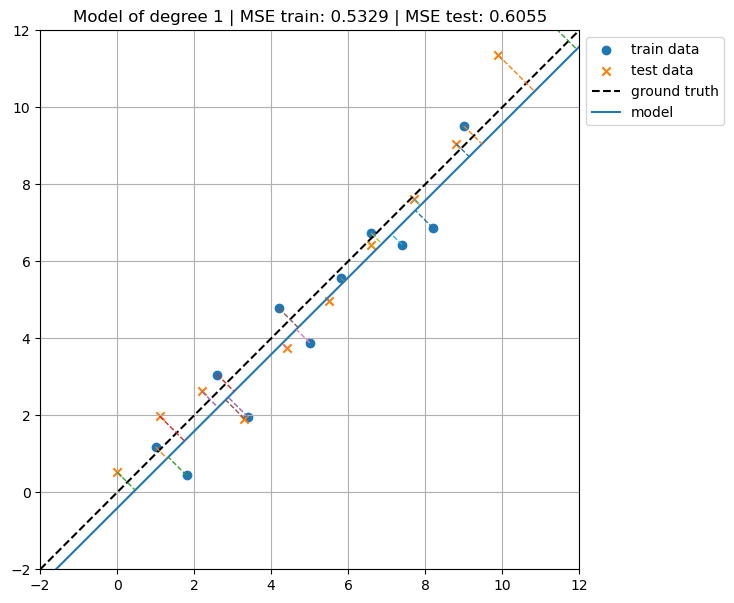

In [11]:
degree = 1
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_line, domain=[-2,12], xlim=[-2,12], ylim=[-2,12])

### Overfitting

Note that the train MSE **improves** while the test MSE **worsens**.

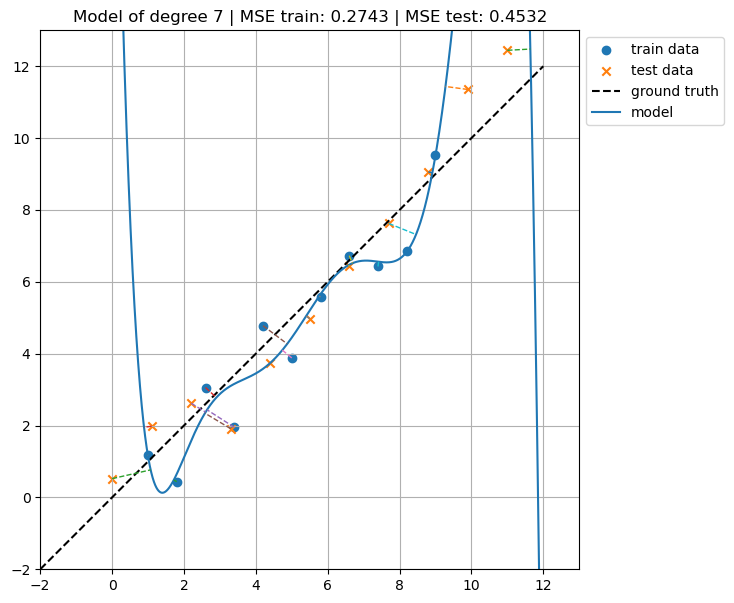

In [12]:
degree = 7
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_line, domain=[-2,12], xlim=[-2,13], ylim=[-2,13])

---

## Example 2: a parabola

In [13]:
def noisy_curve(x, r=.5):
    return (x + np.random.random(size=x.shape) * r - r/2)**2 # and adding some noise: y = (x + u)^2 | u ~ U(-r/2, r/2)

In [14]:
num_points = 10
domain = np.array([-2, 2])

train_x = np.linspace(*domain, num_points)
train_y = noisy_curve(train_x)

test_x = np.linspace(*(domain * 1.5), num_points)
test_y = noisy_curve(test_x)

### Underfitting

However hard we work to fit a parabola with a line, we would fail. The model doesn't have enough capacity.

Pretty bad MSE on both train and test.

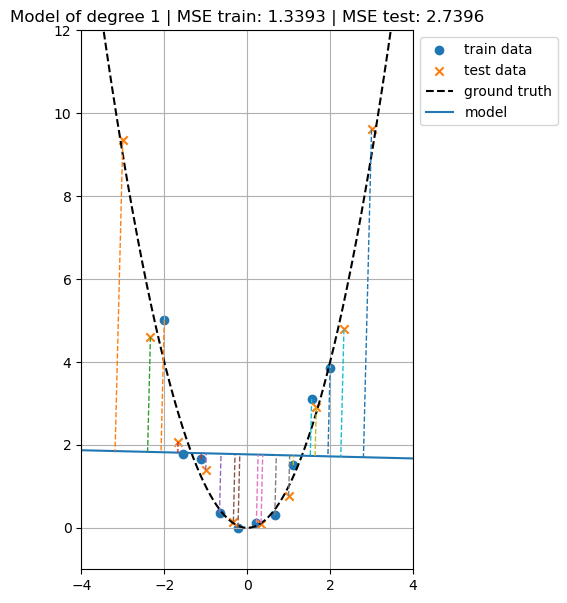

In [15]:
degree = 1
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_curve, domain=[-4, 4], xlim=[-4,4], ylim=[-1, 12])

### Good fit

With a degree 2 we are in business.

Much better MSE on both train and test.

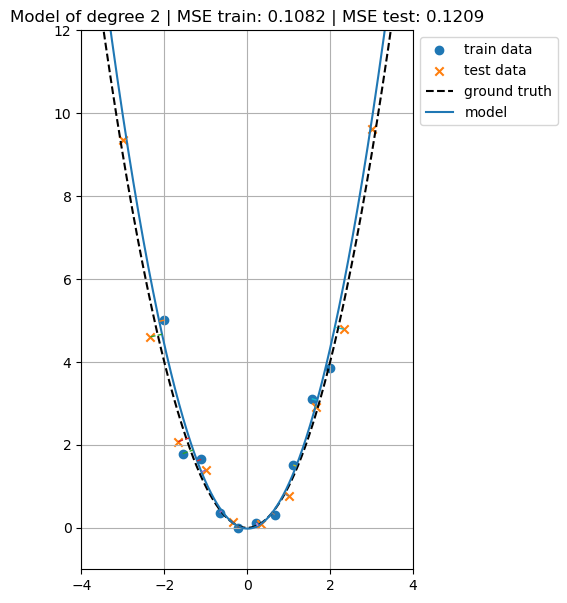

In [16]:
degree = 2
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_curve, domain=[-4, 4], xlim=[-4,4], ylim=[-1, 12])

### Overfitting

With a high degree polynomial we can get really strange results.

The train MSE is **even better** than the good fit while on test we do **worse**!

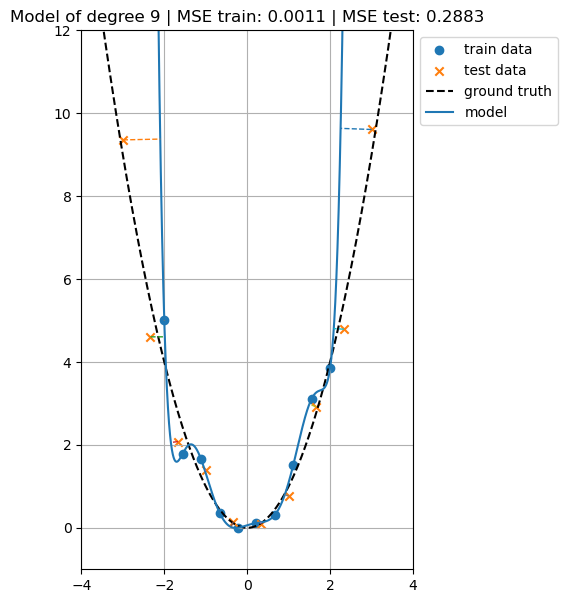

In [17]:
degree = 9
plot_polynomial(degree, train_x, train_y, test_x, test_y, noisy_curve, domain=[-4, 4], xlim=[-4,4], ylim=[-1, 12])

## Why is this relevant?

Because **neural networks adapt their complexity during training** to find the best model for their data.

They can be as simple as a linear model, or, in most cases, so complex they fit every single training data point.

## Double Descent

*Not in the Chollet nor in what you're supposed to know.*

Training on large neural nets has led researchers to come across a phenomenon not described here.

What happens when your neural net is **so complex it can fit all your data points many times over** (*beyond* the overfitting graphs above)?

It seems that the situation with overfitting **actually starts improving again**.

This is called **Double Descent**. It is an active area of research.

<!-- <img style="height:600px" src="images/openai.double-descent.png"> -->
<img style="height:600px" src="https://github.com/jchwenger/AI/blob/main/lectures/04/images/openai.double-descent.png?raw=true">

"Neither classical statisticians’ conventional wisdom that *too large models are worse* nor the modern ML paradigm that *bigger models are better uphold*."

"In general, the peak of test error appears systematically when models are just barely able to fit the train set."

["Deep Double Descent", OpenAI blog](https://openai.com/blog/deep-double-descent)

##### More references

[Nakkiran et al, "Deep Double Descent: Where Bigger Models and More Data Hurt", arXiv](https://arxiv.org/abs/1912.02292)  
[Daniella Witten, double descent, Twitter](https://twitter.com/daniela_witten/status/1292293102103748609?t=ipZls3q9Cf8QRZdp54Ug8w&s=19)    
[adad8m, double descent, Twitter](https://twitter.com/adad8m/status/1582231644223987712?t=fQJ3wE-I2Y1wLb8zBCnn3g&s=03)  

Also: [Alethea Power et al, "Grokking: Generalization Beyond Overfitting on Small Algorithmic Datasets"](https://arxiv.org/abs/2201.02177), and the following discussion:

[Yannic Kilcher,  Grokking: Generalization beyond Overfitting on small algorithmic datasets (Paper Explained)](https://www.youtube.com/watch?v=dND-7llwrpw) 